In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales_df = pd.read_csv("sales_data.csv")
churn_df = pd.read_csv("customer_churn.csv")


In [2]:
sales_df.head()
sales_df.info()

churn_df.head()
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   P

In [3]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Year'] = sales_df['Date'].dt.year

sales_df['Total_Sales'] = sales_df['Total_Sales'].fillna(
    sales_df['Quantity'] * sales_df['Price']
)


In [5]:
merged_df = pd.merge(
    sales_df,
    churn_df,
    left_on="Customer_ID",
    right_on="CustomerID",
    how="inner"
)

# Remove duplicate column after merge
merged_df.drop(columns=["CustomerID"], inplace=True)

merged_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Month,Year,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn


In [6]:
# Total revenue
total_revenue = merged_df['Total_Sales'].sum()

# Revenue by region
region_sales = merged_df.groupby('Region')['Total_Sales'].sum()

# Monthly revenue
monthly_sales = merged_df.groupby('Month')['Total_Sales'].sum()

total_revenue


0

In [7]:
top_customers = (
    merged_df.groupby('Customer_ID')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_customers


Series([], Name: Total_Sales, dtype: int64)

In [8]:
churn_summary = merged_df.groupby('Churn')['Customer_ID'].nunique()
churn_summary


Series([], Name: Customer_ID, dtype: int64)

In [9]:
pivot_table = pd.pivot_table(
    merged_df,
    values='Total_Sales',
    index='Region',
    columns='Churn',
    aggfunc='sum',
    fill_value=0
)

pivot_table


Churn
Region


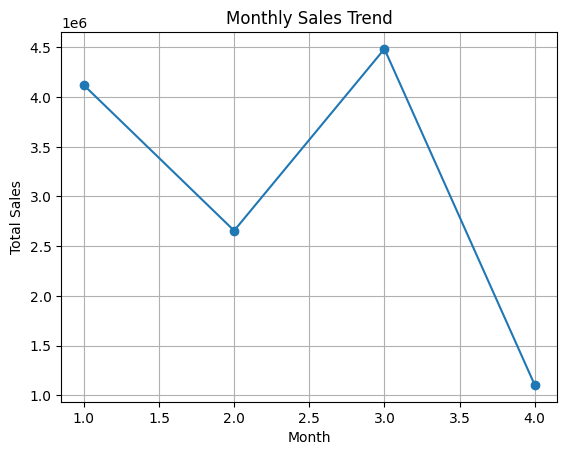

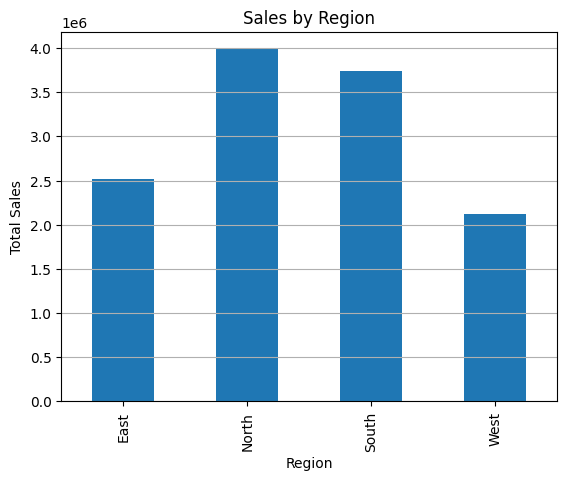

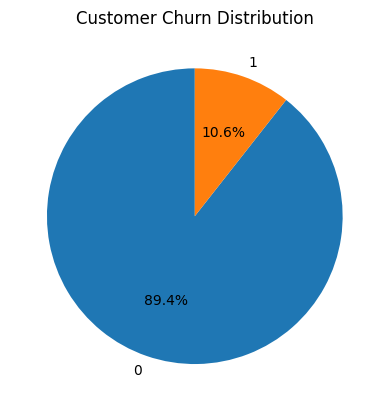

In [14]:
import matplotlib.pyplot as plt

# ------------------ VISUALIZATION 1 ------------------
# Monthly Sales Trend (from sales data)

monthly_sales = sales_df.groupby('Month')['Total_Sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


# ------------------ VISUALIZATION 2 ------------------
# Sales by Region (from sales data)

region_sales = sales_df.groupby('Region')['Total_Sales'].sum()

plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.grid(axis='y')
plt.show()


# ------------------ VISUALIZATION 3 ------------------
# Customer Churn Distribution (from churn data)

churn_summary = churn_df['Churn'].value_counts()

plt.figure()
churn_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()



In [13]:
# ------------------ FINAL REPORT ------------------

total_revenue = sales_df['Total_Sales'].sum()
total_customers = churn_df['CustomerID'].nunique()
average_order_value = sales_df['Total_Sales'].mean()

# Top customer (based on total sales)
top_customer = (
    sales_df.groupby('Customer_ID')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

print("CUSTOMER SALES ANALYSIS REPORT")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ${average_order_value:,.2f}")

print("\nTop Customer:")
print(f"Customer ID: {top_customer.index[0]}")
print(f"Total Sales: ${top_customer.iloc[0]:,.2f}")


CUSTOMER SALES ANALYSIS REPORT
Total Revenue: $12,365,048.00
Total Customers: 500
Average Order Value: $123,650.48

Top Customer:
Customer ID: CUST016
Total Sales: $373,932.00
